In [1]:
import pandas as pd
import requests
import numpy as np

In [2]:
pd.options.display.max_columns=None

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [4]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [5]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-3,3,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,67,37605.jpg,0.0,Özil,0.5,False,None,u,1,3,0,3441,0,54909,9,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,703,288,703,288,703,288,703,288,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Left the club by mutual consent on 20/1,2020-10-21T10:30:18.546407Z,48,39476.jpg,0.0,Papastathopoulos,0.1,False,None,u,1,3,0,10266,0,19139,2,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,672,238,664,239,657,236,675,238,NaN,,NaN,,NaN,
2,75.0,75.0,41270,0,0,-1,1,0,2,0.5,0.0,0,David,0.2,3,False,Hamstring injury - 75% chance of playing,2021-05-02T16:00:26.134258Z,54,41270.jpg,2.0,Luiz Moreira Marinho,0.8,False,None,d,1,3,41,77147,28,130498,196,0.0,7.6,David Luiz,1396,1,0,3,20,0,0,0,1,1,0,0,230,250.6,46.7,144.0,43.9,257,97,342,116,227,62,303,103,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-7,7,3,3,4.1,0.0,0,Pierre-Emerick,3.6,4,False,,2021-04-12T08:30:26.681398Z,113,54694.jpg,4.7,Aubameyang,6.7,False,None,a,1,3,126,1191523,5161,3860365,3234,0.3,11.2,Aubameyang,2162,10,3,9,25,1,0,0,2,0,0,11,350,489.8,323.0,785.0,159.5,113,41,114,77,35,19,52,30,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,0.5,0.0,0,Cédric,0.0,5,False,,2020-09-23T09:00:14.881983Z,46,58822.jpg,2.8,Soares,0.3,False,None,a,1,3,28,41368,62,66027,258,0.0,6.1,Cédric,744,0,1,2,11,0,0,0,1,0,0,3,125,110.8,114.8,66.0,29.2,356,136,241,63,322,106,348,123,NaN,,5.0,,NaN,


In [6]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [7]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [8]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,0.5,67,0,3441,0.0,0
1,Papastathopoulos,1,2,0.1,48,0,10266,0.0,0
2,Luiz Moreira Marinho,1,2,0.8,54,1396,77147,7.6,41
3,Aubameyang,1,3,6.7,113,2162,1191523,11.2,126
4,Soares,1,2,0.3,46,744,41368,6.1,28


In [9]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/srv/conda/envs/notebook/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,1,3,0.5,67,0,3441,0.0,0,Midfielder
1,Papastathopoulos,1,2,0.1,48,0,10266,0.0,0,Defender
2,Luiz Moreira Marinho,1,2,0.8,54,1396,77147,7.6,41,Defender
3,Aubameyang,1,3,6.7,113,2162,1191523,11.2,126,Midfielder
4,Soares,1,2,0.3,46,744,41368,6.1,28,Defender


In [11]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/srv/conda/envs/notebook/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,Arsenal,3,0.5,67,0,3441,0.0,0,Midfielder
1,Papastathopoulos,Arsenal,2,0.1,48,0,10266,0.0,0,Defender
2,Luiz Moreira Marinho,Arsenal,2,0.8,54,1396,77147,7.6,41,Defender
3,Aubameyang,Arsenal,3,6.7,113,2162,1191523,11.2,126,Midfielder
4,Soares,Arsenal,2,0.3,46,744,41368,6.1,28,Defender


In [13]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/srv/conda/envs/notebook/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
34,Martínez,Aston Villa,1,39.1,54,3240,4014123,33.3,180,Goalkeeper,33.3
331,Meslier,Leeds,1,8.0,47,3150,1156389,32.8,154,Goalkeeper,32.8
318,Dallas,Leeds,2,30.7,54,3230,3839042,30.4,164,Defender,30.4
606,Johnstone,West Brom,1,3.0,46,3150,512464,29.3,135,Goalkeeper,29.3
321,Harrison,Leeds,3,4.7,55,2666,1053950,27.6,152,Midfielder,27.6
320,Bamford,Leeds,4,41.7,65,2917,7805020,27.1,176,Forward,27.1
617,Pereira,West Brom,3,5.3,54,2484,998793,27.0,146,Midfielder,27.0
76,Dunk,Brighton,2,6.2,48,2842,1121112,26.9,129,Defender,26.9
266,Areola,Fulham,1,4.6,45,3150,600258,26.9,121,Goalkeeper,26.9
389,Gündogan,Man City,3,18.5,56,1970,4260141,26.8,150,Midfielder,26.8


In [15]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,8.285656
1,Forward,7.176923
2,Goalkeeper,6.806250
3,Midfielder,7.628472


In [16]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,8.285656
3,Midfielder,7.628472
1,Forward,7.176923
2,Goalkeeper,6.806250


In [17]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [18]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [19]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,13.612500
0,Defender,11.300000
3,Midfielder,10.219535
1,Forward,8.825676


In [20]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [21]:
team_pivot.sort_values('value',ascending=False)

,team,value
1,Aston Villa,14.357143
8,Leeds,14.218182
18,West Ham,12.930435
4,Chelsea,12.816667
11,Man City,12.625000
5,Crystal Palace,11.269565
2,Brighton,10.930769
16,Spurs,10.929167
3,Burnley,10.841667
0,Arsenal,10.485185


In [22]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

/srv/conda/envs/notebook/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


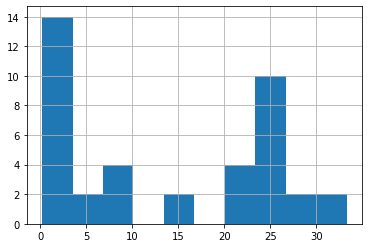

In [23]:
goal_df.value.hist()

In [24]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
34,Martínez,Aston Villa,1,39.1,54,3240,4014123,33.3,180,Goalkeeper,33.3
331,Meslier,Leeds,1,8.0,47,3150,1156389,32.8,154,Goalkeeper,32.8
606,Johnstone,West Brom,1,3.0,46,3150,512464,29.3,135,Goalkeeper,29.3
266,Areola,Fulham,1,4.6,45,3150,600258,26.9,121,Goalkeeper,26.9
165,Mendy,Chelsea,1,10.3,52,2610,1633734,26.5,138,Goalkeeper,26.5
125,Pope,Burnley,1,10.3,55,2880,1054843,26.2,144,Goalkeeper,26.2
560,Lloris,Spurs,1,6.8,56,3240,878206,25.9,145,Goalkeeper,25.9
173,Guaita,Crystal Palace,1,3.9,48,3150,610155,25.2,121,Goalkeeper,25.2
634,Fabianski,West Ham,1,3.5,50,3060,610451,24.8,124,Goalkeeper,24.8
665,dos Santos Patrício,Wolves,1,4.8,53,3240,534666,24.7,131,Goalkeeper,24.7


<AxesSubplot:>

/srv/conda/envs/notebook/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


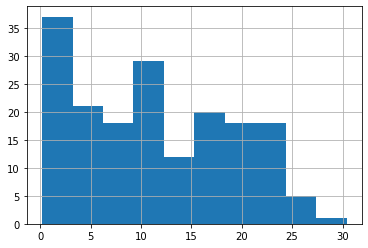

In [25]:
def_df.value.hist()

In [26]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
318,Dallas,Leeds,2,30.7,54,3230,3839042,30.4,164,Defender,30.4
76,Dunk,Brighton,2,6.2,48,2842,1121112,26.9,129,Defender,26.9
49,Targett,Aston Villa,2,12.8,50,3224,1839762,26.2,131,Defender,26.2
638,Cresswell,West Ham,2,16.8,56,2990,3420491,25.4,142,Defender,25.4
441,Wan-Bissaka,Man Utd,2,18.7,57,2970,2131228,24.9,142,Defender,24.9
53,Konsa Ngoyo,Aston Villa,2,6.4,47,3015,1421637,24.5,115,Defender,24.5
395,Cancelo,Man City,2,14.0,58,2289,3004555,24.3,141,Defender,24.3
655,Coufal,West Ham,2,8.3,48,2874,1351261,24.2,116,Defender,24.2
210,Keane,Everton,2,6.7,50,2809,1197893,24.0,120,Defender,24.0
391,Stones,Man City,2,10.0,51,1753,2770251,23.7,121,Defender,23.7


In [27]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
321,Harrison,Leeds,3,4.7,55,2666,1053950,27.6,152,Midfielder,27.6
617,Pereira,West Brom,3,5.3,54,2484,998793,27.0,146,Midfielder,27.0
389,Gündogan,Man City,3,18.5,56,1970,4260141,26.8,150,Midfielder,26.8
651,Soucek,West Ham,3,11.1,52,3240,2964359,26.2,136,Midfielder,26.2
535,Ward-Prowse,Southampton,3,12.6,59,3240,3114990,25.8,152,Midfielder,25.8
567,Son,Spurs,3,46.6,97,2939,8888613,22.8,221,Midfielder,22.8
339,Dias Belloli,Leeds,3,7.2,55,2178,2148246,22.7,125,Midfielder,22.7
648,Bowen,West Ham,3,2.7,59,2455,908645,22.7,134,Midfielder,22.7
682,Lomba Neto,Wolves,3,3.9,55,2549,2326254,22.5,124,Midfielder,22.5
145,Frello Filho,Chelsea,3,4.5,47,1857,1578012,22.1,104,Midfielder,22.1


In [28]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
320,Bamford,Leeds,4,41.7,65,2917,7805020,27.1,176,Forward,27.1
62,Watkins,Aston Villa,4,24.3,64,3148,4603630,24.5,157,Forward,24.5
541,Adams,Southampton,4,5.1,57,2617,1774034,23.9,136,Forward,23.9
218,Calvert-Lewin,Everton,4,33.8,76,2691,9009223,21.2,161,Forward,21.2
120,Wood,Burnley,4,4.2,65,2561,672269,20.6,134,Forward,20.6
486,Wilson,Newcastle,4,5.3,65,2081,4097010,20.6,134,Forward,20.6
565,Kane,Spurs,4,45.4,118,2903,8089434,19.5,230,Forward,19.5
177,Benteke,Crystal Palace,4,1.5,55,1730,289297,18.2,100,Forward,18.2
82,Maupay,Brighton,4,2.3,59,2508,1114863,17.8,105,Forward,17.8
493,McGoldrick,Sheffield Utd,4,1.3,52,2211,454863,17.1,89,Forward,17.1
